# **Project 4 Report**

Michael DesRoches

CS458

## **P4-1. Hierarchical Clustering Dendrogram**

**(a) Randomly generate the following data points:**

In [8]:
# Codes for P4-1(a)
import numpy as np
np.random.seed(0)
X1 = np.random.randn(50,2)+[2,2]
X2 = np.random.randn(50,2)+[6,10]
X3 = np.random.randn(50,2)+[10,2]
X = np.concatenate((X1,X2,X3))

**(b) Use sklearn.cluster.AgglomerativeClustering to cluster the points generated in (a). Plot
your Dendrogram using different linkage{“ward”, “complete”, “average”, “single”}.**

Instructions: Set distance_threshold=0, n_clusters=None in AgglomerativeClustering. The
default metric used to compute the linkage is ‘euclidean’, so you do not need to change this
parameter.


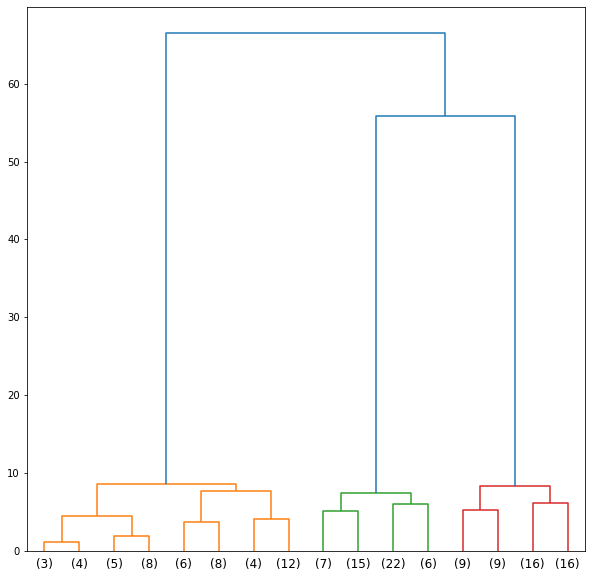

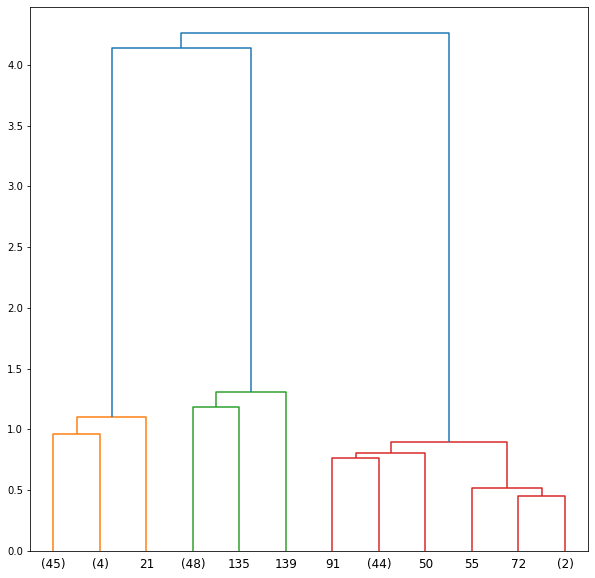

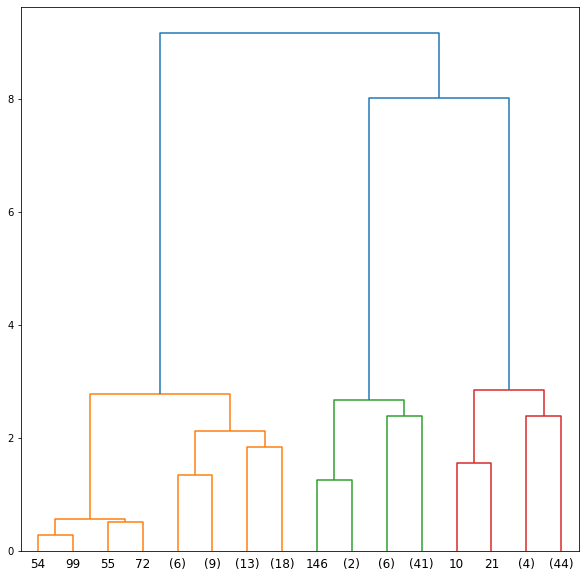

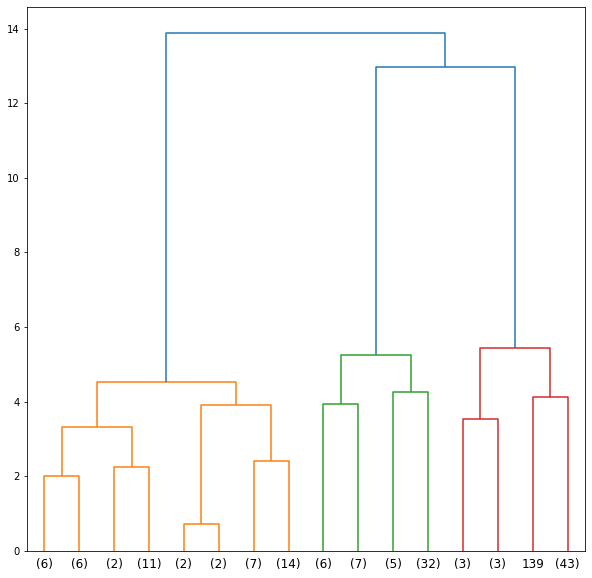

In [9]:
# Code for P4-1(b)
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

c1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward').fit(X)
c2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single').fit(X)
c3 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average').fit(X)
c4 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete').fit(X)

def plot_den(model, **kwargs):
    count = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        c_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                c_count += 1  # leaf node
            else:
                c_count += count[child_idx - n_samples]
        count[i] = c_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      count]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

fig1 = plt.figure(figsize=(10, 10))
plot_den(c1, truncate_mode='level', p=3)

fig2 = plt.figure(figsize=(10, 10))
plot_den(c2, truncate_mode='level', p=3)

fig3 = plt.figure(figsize=(10, 10))
plot_den(c3, truncate_mode='level', p=3)

fig4 = plt.figure(figsize=(10, 10))
plot_den(c4, truncate_mode='level', p=3)

plt.show()

# **P4-2. Clustering structured dataset**

**(a)  Generate a swiss roll dataset:**

In [19]:
# Code for P4-2(a)
from sklearn.datasets import make_swiss_roll

# Generate data (swiss roll dataset)
n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)

# Make it thinner
X[:, 1] *= .5

**(b) Use sklearn.cluster.AgglomerativeClustering to cluster the points generated in (a), where
you set the parameters as n_clusters=6, connectivity=connectivity, linkage='ward', where**

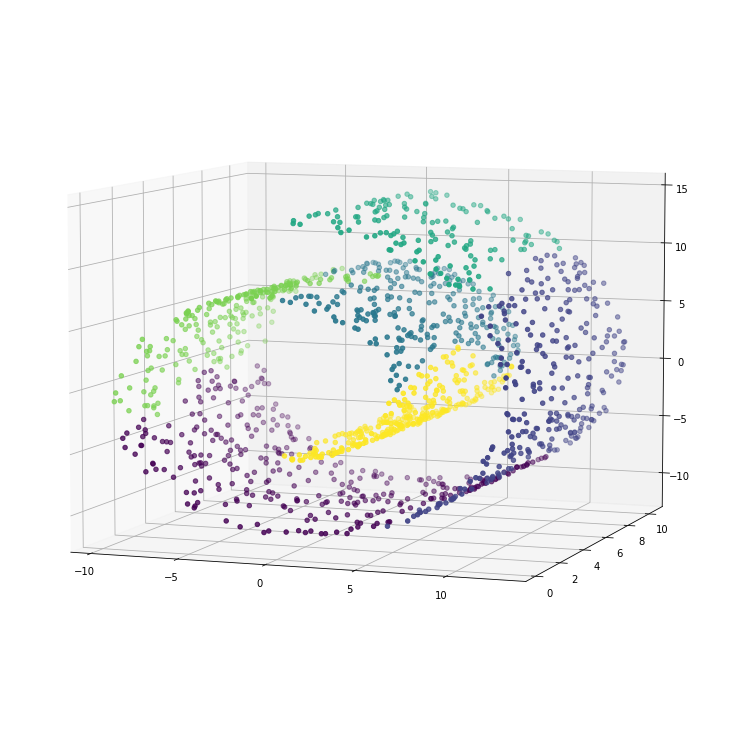

In [23]:
# Codes for P4-2(b)
from sklearn.neighbors import kneighbors_graph

from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import kneighbors_graph
from mpl_toolkits.mplot3d import Axes3D

connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

clustering = AgglomerativeClustering(n_clusters=6, connectivity=connectivity, linkage='ward').fit(X)

dbscan = DBSCAN().fit(X)
csm = np.zeros_like(dbscan.labels_, dtype=bool)
csm[bdscan.core_sample_indices_] = True
labels = dbscan.labels_

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.view_init(7, -70)
ax.scatter(X[:,0], X[:,1], X[:,2], c=clustering.labels_)

plt.show()

**(c) Use sklearn.cluster.DBSCAN to cluster the points generated in (a). Plot the clustered data in
a 3D figure and use different colors different clusters in your figure. Discuss and compare the
results of DBSCAN with the results in (b).**

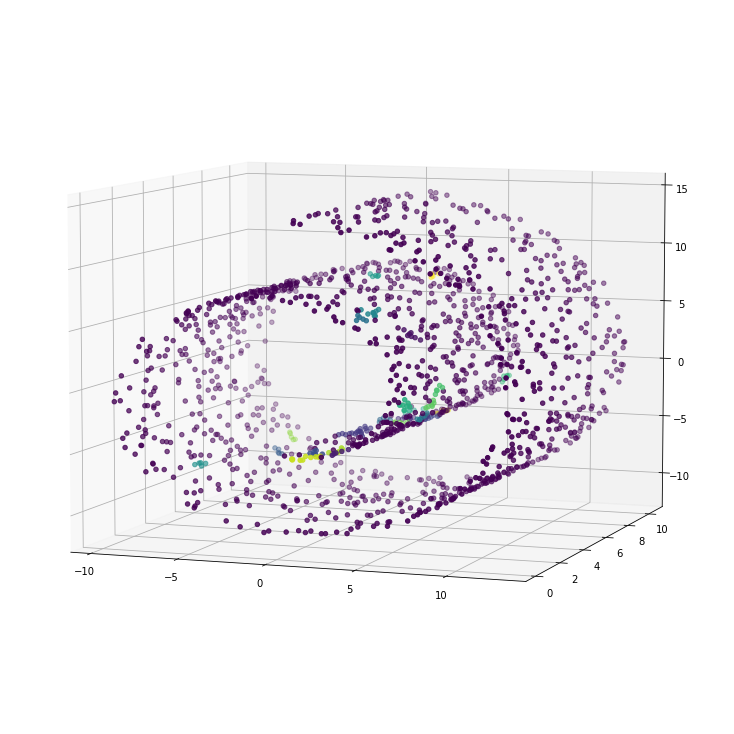

In [22]:
# Code for P4-2(c) here

fig2 = plt.figure(figsize=(10, 10))
ax2 = Axes3D(fig2)
ax2.view_init(7, -70)
ax2.scatter(X[:,0], X[:,1], X[:,2], c=bdscan.labels_)

plt.show()

# **P4-3. Clustering the handwritten digits data**
Use the hand-written digits dataset embedded in scikit-learn:

In [25]:
from sklearn import datasets
digits = datasets.load_digits()

**(a)Use the following methods to cluster the data:**
- K-Means (sklearn.cluster.KMeans)
- DBSCAN (sklearn.cluster.DBSCAN)

Optimize the parameters of these methods.

In [26]:
# Codes for P4-3(a)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
import numpy as np

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X = digits.data

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

kcluster = KMeans(n_clusters=7).fit(X)
bdscan = DBSCAN().fit(X)
core_samples_mask = np.zeros_like(bdscan.labels_, dtype=bool)
core_samples_mask[bdscan.core_sample_indices_] = True
labels = bdscan.labels_

kcluster.predict(X)
bdscan.fit_predict(X)

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

**(b) Evaluate these methods based on the labels of the data and discuss which method gives you
the best results in terms of accuracy.**

In [19]:
# Codes for P4-3(b)